# 1. Importing the data

In [10]:
# Import all necessary libraries
import pandas as pd
import numpy as np
from numpy import nan as NA
import requests as rq
import json
import os
import plotly.graph_objects as go
import seaborn as sns
import psycopg2
import matplotlib.pyplot as plt
import csv

# After downloading the datasets "Internet availability", "Education attainment" and "Population by county",
# you will need to save the *.csv files to your Downloads folder. Once done, run the code below.

# Standard file path for all files
home_directory = os.path.expanduser('~') # Retrieve user's home directory
file_path = os.path.join(home_directory,'Downloads') # Create file path

# Create function to import *.csv file and handle exceptions
def import_csv_file(file_path):
    try:
        if not os.path.exists(file_path): # Check if the file exists
            raise FileNotFoundError(f"The file {file_path} does not exist.")
        df = pd.read_csv(file_path) # Read the *.csv file into a Pandas DataFrame
        return df
    except FileNotFoundError as e:
        print(f"Error: {e}")
    except pd.errors.ParserError:
        print(f"Error: Unable to parse the CSV file. Make sure it is a valid CSV file.")
    except Exception as e:
        print(f'Error: An unexpected error occurred. {str(e)}')
        
# Create function to make API request and handle exceptions
def make_api_request(api_url, file_path): # Function to make API request and handle exceptions
    try:
        response = rq.get(api_url) # Make the API request
        if response.status_code == 200: # Check if the request was successful
            try: # Try to parse the JSON response
                data = response.json()
                df = pd.DataFrame(data[1:], columns=data[0]) # Convert data to a Pandas DataFrame
                df.to_csv(file_path, index=False) # Export the DataFrame to CSV
                return df
            except json.JSONDecodeError:
                print(f'Error: Unable to decode JSON response for {api_url}.')
        else:
            print(f'Error: Unable to fetch data for {api_url}. Status code: {response.status_code}')
            print(response.content)  # Print the response content for inspection
    except Exception as e:
        print(f'Error: An unexpected error occurred. {str(e)}')

# 1.1. Percentage of Households with No Internet Access dataset
file1 = 'data_061018.csv' # Input file name
internet_file_name = 'internet_dataset.csv' # Output file name
internet_csv_file = os.path.join(file_path,file1) # Join path with file name
file_path = internet_csv_file
internet = import_csv_file(file_path) # Import the *.csv file of the first dataset
if internet is not None:
    print("Household with no internet access dataset sample:")
    print(internet.head()) # Display the first few rows of the DataFrames if not null
    print()
file_path = os.path.join(home_directory,'Downloads') # Return the file path to its original value

# 1.2. Socioeconomic Status - Educational Attainment dataset
file2 = 'data_103302.csv' # Input file name
education_file_name = 'education_dataset.csv' # Output file name
education_csv_file = os.path.join(file_path,file2) # Join path with file name
file_path = education_csv_file
education = import_csv_file(file_path) # Import the *.csv file of the second dataset
if education is not None: 
    print("Educational attainment dataset sample:")
    print(education.head()) # Display the first few rows of the DataFrames if not null
    print()
file_path = os.path.join(home_directory,'Downloads') # Return the file path to its original value

# 1.3. Median household income in the past 12 months (in 2021 inflation-adjusted dollars) dataset
api_key = '4b4ba8551d1fa3638f621a3840d14bae0f6858bc' # API Key
api_url = f'https://api.census.gov/data/2021/acs/acsse?get=NAME,K201902_001E&for=county:*&key={api_key}' # API URL
income_file_name = 'income_dataset.csv' # Output file name
income_csv_file = os.path.join(file_path,income_file_name) # Join path with file name
file_path = income_csv_file
income = make_api_request(api_url, file_path) # Make the API request for the third dataset
if income is not None: 
    print("Median household income dataset sample:")
    print(income.head()) # Display the first few rows of the DataFrames if not null
    print("\nMedian household income dataset exported as CSV file into the path:") # Print the path to the exported CSV files
    print(income_csv_file)
    print()
income_dataset = pd.read_csv(income_csv_file) # Import the *.csv file created
file_path = os.path.join(home_directory,'Downloads') # Return the file path to its original value

# 1.4. Population by county dataset
file3 = 'data_103802.csv' # Input file name
population_file_name = 'population_dataset.csv' # Output file name
population_csv_file = os.path.join(file_path,file3) # Join path with file name
file_path = population_csv_file
population = import_csv_file(file_path) # Import the *.csv file of the fourth dataset
if population is not None: 
    print("Population by county dataset sample:")
    print(population.head()) # Display the first few rows of the DataFrames if not null
    print()
file_path = os.path.join(home_directory,'Downloads') # Return the file path to its original value

Error: The file C:\Users\conno\Downloads\data_061018.csv does not exist.
Educational attainment dataset sample:
   StateFIPS    State  CountyFIPS   County  Start Year  End Year  Value  \
0          1  Alabama        1001  Autauga        2017      2021   12.7   
1          1  Alabama        1003  Baldwin        2017      2021    9.7   
2          1  Alabama        1005  Barbour        2017      2021   27.7   
3          1  Alabama        1007     Bibb        2017      2021   23.7   
4          1  Alabama        1009   Blount        2017      2021   16.8   

   Data Comment  Unnamed: 8  
0           NaN         NaN  
1           NaN         NaN  
2           NaN         NaN  
3           NaN         NaN  
4           NaN         NaN  

Median household income dataset sample:
                      NAME K201902_001E state county
0  Autauga County, Alabama        63812    01    001
1  Baldwin County, Alabama        63866    01    003
2  Barbour County, Alabama        41345    01    005
3   

## 2. Checking the quality of the data

In [11]:
# 2.1. Percentage of Households with No Internet Access dataset
if internet is not None:
    print("Household with no internet access dataset overview:")
    print(internet.info()) # Describe the dataset
    print()

# 2.2. Socioeconomic Status - Educational Attainment dataset
if education is not None: 
    print("Educational attainment dataset overview:")
    print(education.info()) # Describe the dataset
    print()

# 2.3. Median household income in the past 12 months (in 2021 inflation-adjusted dollars) dataset
if income_dataset is not None: 
    print("Median household income dataset overview:")
    print(income_dataset.info()) # Describe the dataset
    print()

# 2.4. Population by county dataset
if population is not None: 
    print("Population by county dataset overview:")
    print(population.info()) # Describe the dataset
    print()

Educational attainment dataset overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3143 entries, 0 to 3142
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   StateFIPS     3143 non-null   int64  
 1   State         3143 non-null   object 
 2   CountyFIPS    3143 non-null   int64  
 3   County        3143 non-null   object 
 4   Start Year    3143 non-null   int64  
 5   End Year      3143 non-null   int64  
 6   Value         3143 non-null   float64
 7   Data Comment  0 non-null      float64
 8   Unnamed: 8    0 non-null      float64
dtypes: float64(3), int64(4), object(2)
memory usage: 221.1+ KB
None

Median household income dataset overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1905 entries, 0 to 1904
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   NAME          1905 non-null   object
 1   K201902_001E  1905 non-null   i

## 3. Pre-processing the data and plotting visuals

In [12]:
# Check for missing values, non-numeric values and outliers in the datasets

# Set visuals standard
colors = ['lightslategray',] * 10
colors[0] = 'crimson'

# 3.1. Percentage of Households with No Internet Access dataset
internet_bystate = internet.groupby(['State'], as_index=False)['Value'].mean() # Group observations by state using the mean percentage of the predictor 
internet_bystate_sortdesc = internet_bystate.sort_values('Value',ascending=False) # Sort the observations in descending order
xvar1 = list(internet_bystate_sortdesc.head(10)['State']) # Set X axis labels
yvar1 = list(internet_bystate_sortdesc.head(10)['Value']) # Set Y axis labels
fig1 = go.Figure(data=[go.Bar(x=xvar1,y=yvar1,marker_color=colors)]) # Create a histogram of the predictor
fig1.update_layout(title_text = 'States with the highest percentage of households with no internet access, 2021', # Set the title of the figure
                   title_x=0.5, # Center the title of the plot horizontally
                   xaxis_title_text='States', # Set X axis title
                   yaxis_title_text='Percentage of no internet access', # Set Y axis title
                   bargap=0.05) # Set gap between the bars
fig1.show()
internet = internet_bystate # Replace the dataset for the grouped one
print("\033[1mHousehold with no internet access dataset overview:\033[0m")
internet_null = internet['Value'].isnull().sum() # Check for missing values
print("Missing values:")
print(internet_null) 
internet_NaN = pd.to_numeric(internet['Value'], errors='coerce').isna().sum() # Check for non-numeric values
print("Non-numeric values:")
print(internet_NaN)
print(internet.head())
plt.figure(figsize=(3, 5))  # Set boxplot size
sns.boxplot(y=internet['Value']) # Create a boxplot to check for outliers
plt.ylabel('No internet access observations') # Set Y axis label
plt.show()
print()

# 3.2. Socioeconomic Status - Educational Attainment dataset
education_bystate = education.groupby(['State'], as_index=False)['Value'].mean() # Group observations by state using the mean percentage of the predictor 
education_bystate_sortdesc = education_bystate.sort_values('Value',ascending=True) # Sort the observations in ascending order
xvar2 = list(education_bystate_sortdesc.head(10)['State']) # Set X axis labels
yvar2 = list(education_bystate_sortdesc.head(10)['Value']) # Set Y axis labels
fig2 = go.Figure(data=[go.Bar(x=xvar2,y=yvar2,marker_color=colors)]) # Create a histogram of the predictor
fig2.update_layout(title_text = 'States with the lowest percentage of the population with higher education, 2021', # Set the title of the figure
                   title_x=0.5, # Center the title of the plot horizontally
                   xaxis_title_text='States', # Set X axis title
                   yaxis_title_text='Percentage of educational attainment', # Set Y axis title
                   bargap=0.05) # Set gap between the bars
fig2.show()
education = education_bystate # Replace the dataset for the grouped one
print("\033[1mEducational attainment dataset overview:\033[0m")
education_null = education['Value'].isnull().sum() # Check for missing values
print("Missing values:")
print(education_null)
education_NaN = pd.to_numeric(education['Value'], errors='coerce').isna().sum() # Check for non-numeric values
print("Non-numeric values:")
print(education_NaN)
print(education.head())
plt.figure(figsize=(3, 5))  # Set boxplot size
sns.boxplot(y=education['Value']) # Create a boxplot to check for outliers
plt.ylabel('Educational attainment observations') # Set Y axis label
plt.show()
print()

# 3.3. Median household income in the past 12 months (in 2021 inflation-adjusted dollars) dataset
income_dataset = income_dataset.rename(columns={'county': 'county code'}) # Rename the attribute county code
income_dataset = income_dataset.rename(columns={'state': 'state code'}) # Rename the attribute state code
income_dataset = income_dataset.rename(columns={'K201902_001E': 'Value'}) # Rename the attribute K201902_001E to Median Income
income_dataset[['County', 'State']] = income_dataset['NAME'].str.split(', ',expand=True) # Split the attribute NAME into County and State, delimited by the comma
income_dataset['County'] = income_dataset['County'].str.replace(' County', '') # Remove the "County" text of the observations in the attribute County
income_bystate = income_dataset.groupby(['State'], as_index=False)['Value'].median() # Group observations by state using the sum of the predictor 
income_bystate_sortdesc = income_bystate.sort_values('Value',ascending=False) # Sort the observations in descending order
yvar3 = list(income_bystate_sortdesc.head(10)['State']) # Set X axis labels
xvar3 = list(income_bystate_sortdesc.head(10)['Value']) # Set Y axis labels
fig3 = go.Figure(data=[go.Bar(x=xvar3,y=yvar3,marker_color=colors, orientation='h')]) # Create a histogram of the predictor
fig3.update_layout(title_text = 'States with the highest income per household, 2021', # Update the layout of the figure
                   title_x=0.5, # Center the title of the plot horizontally
                   xaxis_title_text='Median household income', # Set X axis title
                   yaxis_title_text='States', # Set Y axis title
                   yaxis=dict(autorange='reversed'), # Set the Y axis to show the highest value on top
                   bargap=0.05) # Set gap between the bars
fig3.show()
income = income_bystate # Replace the dataset for the grouped one
print("\033[1mMedian household income dataset overview:\033[0m")
income_null = income_dataset['Value'].isnull().sum() # Check for missing values
print("Missing values:")
print(income_null) # Check for missing values
income_NaN = pd.to_numeric(income_dataset['Value'], errors='coerce').isna().sum() # Check for non-numeric values
print("Non-numeric values:")
print(income_NaN)
print(income.head())
plt.figure(figsize=(3, 5))  # Set boxplot size
sns.boxplot(y=income_dataset['Value']) # Create a boxplot to check for outliers
plt.ylabel('Median income observations') # Set Y axis label
plt.show()
print()

# 3.4. Population by county dataset
population['Value'] = population['Value'].astype(str) # Convert the 'Value' column to string
population['Value'] = pd.to_numeric(population['Value'].str.replace('[^\d]', '', regex=True), errors='coerce') # Replace non-numeric characters and convert to numeric
print("\033[1mPopulation by county dataset overview:\033[0m")
population_null = population['Value'].isnull().sum() # Check for missing values
print("Missing values:")
print(population_null)
population_NaN = pd.to_numeric(population['Value'], errors='coerce').isna().sum() # Check for non-numeric values
print("Non-numeric values:")
print(population.head())
print(population_NaN)
plt.figure(figsize=(3, 5))  # Set boxplot size 
sns.boxplot(y=population['Value']) # Create a boxplot to check for outliers
plt.ylabel('Population observations') # Set Y axis label
plt.show()
print()

AttributeError: 'NoneType' object has no attribute 'groupby'

## 4. Merging the datasets and exporting as *.csv files

In [13]:
# Standard file path for all files
home_directory = os.path.expanduser('~') # Retrieve user's home directory
file_path = os.path.join(home_directory,'Downloads') # Create file path

# Merge Educational Attainment and Not Internet Access datasets into one
dataset1 = pd.merge(internet, education, on='State')
dataset1.rename(columns = {'Value_x':'internet', 
                          'Value_y':'education'}, 
                          inplace = True)
print(dataset1.head())

# Export first new dataset as a new *.csv file
file_name1 = 'Edu_Net_Data.csv'
file_path1 = os.path.join(file_path,file_name1)
if dataset1 is not None: 
    dataset1.to_csv(file_path1, index=False)
    print("\nEducational Attainment vs. Not Internet Access dataset exported as *.csv file into the path:") # Print the path to the exported CSV files
    print(file_path1)
    print()

# Merge Median Annual Income and Not Internet Access datasets into one
dataset2 = pd.merge(income, internet, on='State')
dataset2.rename(columns = {'Value_x':'income', 
                          'Value_y':'internet'}, 
                          inplace = True)
print(dataset2.head())

# Export second new dataset as a new *.csv file
file_name2 = 'Income_Data.csv'
file_path2 = os.path.join(file_path,file_name2)
if dataset2 is not None: 
    dataset2.to_csv(file_path2, index=False)
    print("\nMedian Annual Income vs. Not Internet Access dataset exported as *.csv file into the path:") # Print the path to the exported CSV files
    print(file_path2)
    print()

# Export the population dataset as a new *.csv file
file_name3 = 'Population_Data.csv'
file_path3 = os.path.join(file_path,file_name3)
if population is not None: 
    population.to_csv(file_path3, index=False)
    print("\nPopulation dataset exported as *.csv file into the path:") # Print the path to the exported CSV files
    print(file_path3)
    print()

TypeError: Can only merge Series or DataFrame objects, a <class 'NoneType'> was passed

# 5. Uploading the data to the PostgreSQL database

## 5.1. Educational Attainment vs. No Internet Access dataset

Error while connecting to PostgreSQL -  database "edu_net" already exists

Error while connecting to PostgreSQL -  relation "edu_net" already exists

Error:  [Errno 2] No such file or directory: 'C:\\Users\\conno\\Downloads\\Edu_Net_Data.csv'
Empty DataFrame
Columns: [state, internet, education]
Index: []
Empty DataFrame
Columns: [state, No Internet Access (%), Educational Attainment (%)]
Index: []



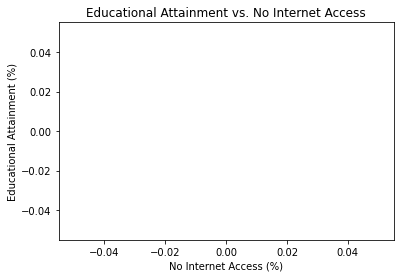

In [14]:
# Import all necessary libraries
import os
import seaborn as sns
import psycopg2
import csv
import pandas as pd
import pandas.io.sql as sqlio

# Standard file path for all files
home_directory = os.path.expanduser('~') # Retrieve user's home directory
file_path = os.path.join(home_directory,'Downloads') # Create file path

# Setting the file path
file_path1 = os.path.join(file_path,'Edu_Net_Data.csv')
file_path2 = os.path.join(file_path,'Income_Data.csv')
file_path3 = os.path.join(file_path,'Population_Data.csv')

# Connect to PostgreSQL database from Python and create a new database
try:
     dbConnection = psycopg2.connect(user = "dap",
                                     password = "dap",
                                     host = "192.168.56.30",
                                     port = "5432",
                                     database = "postgres")
     dbConnection.set_isolation_level(0) # AUTOCOMMIT
     dbCursor = dbConnection.cursor()
     dbCursor.execute('CREATE DATABASE edu_net;')
     dbCursor.close()
except (Exception , psycopg2.Error) as dbError :
     print ("Error while connecting to PostgreSQL - ", dbError)
finally:
     if(dbConnection):
         dbConnection.close()

# Create a table in the new database
table1 = """
CREATE TABLE edu_net(
State VARCHAR(255),
internet FLOAT,
education FLOAT);
"""
try:
    dbConnection = psycopg2.connect(
                                     user = "dap",
                                     password = "dap",
                                     host = "192.168.56.30",
                                     port = "5432",
                                     database = "edu_net")
    dbConnection.set_isolation_level(0) # AUTOCOMMIT
    dbCursor = dbConnection.cursor()
    dbCursor.execute(table1)
    dbCursor.close()
except (Exception , psycopg2.Error) as dbError :
     print ("Error while connecting to PostgreSQL - ", dbError)
finally:
     if(dbConnection):
         dbConnection.close()
        
# Populate the table in PostgreSQL with data from the first CSV file
try:
     dbConnection = psycopg2.connect(
                                     user = "dap",
                                     password = "dap",
                                     host = "192.168.56.30",
                                     port = "5432",
                                     database = "edu_net")
     dbConnection.set_isolation_level(0) # AUTOCOMMIT
     dbCursor = dbConnection.cursor()
     insertString = "INSERT INTO edu_net VALUES ('{}',"+"{},"+"{})"
     with open(file_path1, 'r') as f:
         reader = csv.reader(f)
         next(reader) # Skip the header
         for row in reader:
             dbCursor.execute(insertString.format(*row))
     dbCursor.close()
except (Exception , psycopg2.Error) as dbError :
     print ("Error: ", dbError)
finally:
     if(dbConnection):
         dbConnection.close()
        
# Query the table and store the result in a Pandas DataFrame
sql1 = """
     SELECT * FROM edu_net;"""
try:
     dbConnection = psycopg2.connect(
                                     user = "dap",
                                     password = "dap",
                                     host = "192.168.56.30",
                                     port = "5432",
                                     database = "edu_net")
     edu_net_dataframe = sqlio.read_sql_query(sql1, dbConnection)
except (Exception , psycopg2.Error) as dbError :
     print ("Error: ", dbError)
finally:
     if(dbConnection):
         dbConnection.close()
print(edu_net_dataframe)

# Rename columns for better readability
edu_net_dataframe.rename(columns = {'internet':'No Internet Access (%)', 'education':'Educational Attainment (%)'}, inplace = True)

# Display the first few rows of the DataFrame
print(edu_net_dataframe.head())
print()

# Visualize the relationship between "No Internet Access (%)" and "Educational Attainment (%)"
sns.regplot(x="No Internet Access (%)",
            y="Educational Attainment (%)", 
            data=edu_net_dataframe).set(title='Educational Attainment vs. No Internet Access');

# 5.2. Median Annual Income vs. No Internet Access dataset

Error:  column "alabama" does not exist
LINE 1: INSERT INTO income_net VALUES ('1',Alabama,2020)
                                           ^

Empty DataFrame
Columns: [state, income, internet]
Index: []
Empty DataFrame
Columns: [state, Median Annual Income ($), No Internet Access (%)]
Index: []



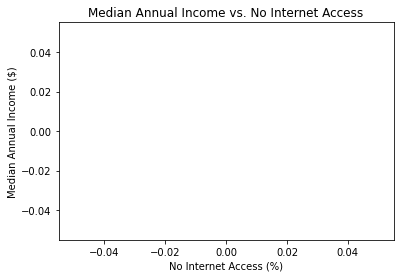

In [3]:
# Import all necessary libraries
import os
import seaborn as sns
import psycopg2
import csv
import pandas as pd
import pandas.io.sql as sqlio

# Standard file path for all files
home_directory = os.path.expanduser('~') # Retrieve user's home directory
file_path = os.path.join(home_directory,'Downloads') # Create file path

# Setting the file path
file_path1 = os.path.join(file_path,'Edu_Net_Data.csv')
file_path2 = os.path.join(file_path,'Income_Data.csv')

# Connect to PostgreSQL database from Python and create a new database
try:
     dbConnection = psycopg2.connect(user = "dap",
                                     password = "dap",
                                     host = "192.168.56.30",
                                     port = "5432",
                                     database = "postgres")
     dbConnection.set_isolation_level(0) # AUTOCOMMIT
     dbCursor = dbConnection.cursor()
     dbCursor.execute('CREATE DATABASE income_net;')
     dbCursor.close()
except (Exception , psycopg2.Error) as dbError :
     print ("Error while connecting to PostgreSQL - ", dbError)
finally:
     if(dbConnection):
         dbConnection.close()

# Create a table in the new database
table2 = """
CREATE TABLE income_net(
State VARCHAR(255),
income FLOAT,
internet FLOAT);
"""
try:
    dbConnection = psycopg2.connect(
                                     user = "dap",
                                     password = "dap",
                                     host = "192.168.56.30",
                                     port = "5432",
                                     database = "income_net")
    dbConnection.set_isolation_level(0) # AUTOCOMMIT
    dbCursor = dbConnection.cursor()
    dbCursor.execute(table2)
    dbCursor.close()
except (Exception , psycopg2.Error) as dbError :
     print ("Error while connecting to PostgreSQL - ", dbError)
finally:
     if(dbConnection):
         dbConnection.close()
        
# Populate the table in PostgreSQL with data from the first CSV file
try:
     dbConnection = psycopg2.connect(
                                     user = "dap",
                                     password = "dap",
                                     host = "192.168.56.30",
                                     port = "5432",
                                     database = "income_net")
     dbConnection.set_isolation_level(0) # AUTOCOMMIT
     dbCursor = dbConnection.cursor()
     insertString = "INSERT INTO income_net VALUES ('{}',"+"{},"+"{})"
     with open(file_path2, 'r') as f:
         reader = csv.reader(f)
         next(reader) # Skip the header
         for row in reader:
             dbCursor.execute(insertString.format(*row))
     dbCursor.close()
except (Exception , psycopg2.Error) as dbError :
     print ("Error: ", dbError)
finally:
     if(dbConnection):
         dbConnection.close()
        
# Query the table and store the result in a Pandas DataFrame
sql2 = """
     SELECT * FROM income_net;"""
try:
     dbConnection = psycopg2.connect(
                                     user = "dap",
                                     password = "dap",
                                     host = "192.168.56.30",
                                     port = "5432",
                                     database = "income_net")
     income_net_dataframe = sqlio.read_sql_query(sql2, dbConnection)
except (Exception , psycopg2.Error) as dbError :
     print ("Error: ", dbError)
finally:
     if(dbConnection):
         dbConnection.close()
print(income_net_dataframe)

# Rename columns for better readability
income_net_dataframe.rename(columns = {'income':'Median Annual Income ($)', 'internet':'No Internet Access (%)'}, inplace = True)

# Display the first few rows of the DataFrame
print(income_net_dataframe.head())
print()

# Visualize the relationship between "No Internet Access (%)" and "Median Annual Income ($)"
sns.regplot(x="No Internet Access (%)",
            y="Median Annual Income ($)", 
            data=income_net_dataframe).set(title='Median Annual Income vs. No Internet Access');